# New York City Taxi Fare Prediction
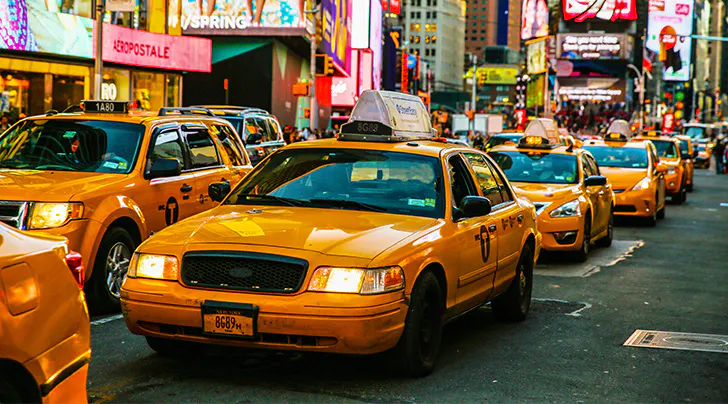

In this assignment, we will foresee the passage sum for a taxi ride in New York City, surrendered the pick, drop off areas and the date season of the get. We will begin from making an easiest model after some essential information cleaning, this straightforward model isn't Machine Learning, at that point we will move to more complex models. We should begin.

## Environment setup for python
At first, we have to import the python libraries which will be used in this project. Then we have to lead the tarin and test data. But our train data has almost 55M rows and it's quite impossible for us to use the whole dataset. That's why we'll a part of the dataset.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for plotting 
import seaborn as sns # high quality image
sns.set()  # use Seaborn styles
from collections import Counter
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/new-york-city-taxi-fare-prediction/GCP-Coupons-Instructions.rtf
/kaggle/input/new-york-city-taxi-fare-prediction/train.csv
/kaggle/input/new-york-city-taxi-fare-prediction/test.csv
/kaggle/input/new-york-city-taxi-fare-prediction/sample_submission.csv


In [2]:
#Here we're keeping out train dataset in "train_df" data frame and test dataset in "test_df" data frame.
train_df = pd.read_csv('/kaggle/input/new-york-city-taxi-fare-prediction/train.csv', nrows = 10_000_000)
test_df = pd.read_csv('/kaggle/input/new-york-city-taxi-fare-prediction/test.csv')

### dataset observations
Now our 1st task is to carefully observe the test and train dataset using python's built in function.

>01) At first, we're trying to find out the column's name & info of the train and test dataset

In [3]:
train_df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [4]:
test_df.head()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


02) Now the datetype of the train and test dataset are shown

In [5]:
train_df.dtypes

key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [6]:
test_df.dtypes

key                   object
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

03) here the dimension of the dataset is shown

In [7]:
print('train_df: ' + str(train_df.shape))
print('test_df: ' + str(test_df.shape))

train_df: (10000000, 8)
test_df: (9914, 7)


04) It's time to know some statistical information about the train and test dataset

In [8]:
train_df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,1.000000e+07,1.000000e+07,1.000000e+07,9.999931e+06,9.999931e+06,1.000000e+07
mean,1.133854e+01,-7.250775e+01,3.991934e+01,-7.250897e+01,3.991913e+01,1.684793e+00
std,9.799930e+00,1.299421e+01,9.322539e+00,1.287532e+01,9.237280e+00,1.323423e+00
min,-1.077500e+02,-3.439245e+03,-3.492264e+03,-3.426601e+03,-3.488080e+03,0.000000e+00
25%,6.000000e+00,-7.399207e+01,4.073491e+01,-7.399139e+01,4.073403e+01,1.000000e+00
50%,8.500000e+00,-7.398181e+01,4.075263e+01,-7.398016e+01,4.075316e+01,1.000000e+00
75%,1.250000e+01,-7.396710e+01,4.076712e+01,-7.396367e+01,4.076810e+01,2.000000e+00
max,1.273310e+03,3.457626e+03,3.344459e+03,3.457622e+03,3.351403e+03,2.080000e+02


In [9]:
test_df.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252193,40.573143,-74.263242,40.568973,1.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000


## Data cleaning
In Machine Learning world data cleaning is the most important part of ML project. We on avg spend 85% of time on cleaning dataset because our ML model's result is going to extremely depends on data cleaning.
##### Data cleaning will be applied on train data only

01) Missig values: At first, we are going to resolve the missing values. Since out train dataset is huge so we're not going to generate missing value. We'll drop the missing rows.

In [10]:
print(train_df.isnull().sum())

key                   0
fare_amount           0
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude    69
dropoff_latitude     69
passenger_count       0
dtype: int64


In [11]:
print('Old size: %d' % len(train_df))
train_df = train_df.dropna(how = 'any', axis = 'rows')
print('New size: %d' % len(train_df))

Old size: 10000000
New size: 9999931


In [12]:
print(train_df.isnull().sum())

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64


02) Valied fare: A valied fare is always positive number. So we have to remove the fare which are less than or equal to Zero.

In [13]:
# count how many negative and Zero values are here
Counter(train_df['fare_amount'] <= 0)

Counter({False: 9999242, True: 689})

In [14]:
train_df['fare_amount'].describe()

count    9.999931e+06
mean     1.133849e+01
std      9.799845e+00
min     -1.077500e+02
25%      6.000000e+00
50%      8.500000e+00
75%      1.250000e+01
max      1.273310e+03
Name: fare_amount, dtype: float64

In [15]:
print('before: ' + str(train_df.shape))
train_df = train_df.drop(train_df[train_df['fare_amount'] <= 0].index, axis = 0)
print('after: ' + str(train_df.shape))

before: (9999931, 8)
after: (9999242, 8)


In [16]:
train_df['fare_amount'].describe()

count    9.999242e+06
mean     1.133966e+01
std      9.798609e+00
min      1.000000e-02
25%      6.000000e+00
50%      8.500000e+00
75%      1.250000e+01
max      1.273310e+03
Name: fare_amount, dtype: float64

03) passenger_count: This value is always greater than or equal to one. On the other hand, a standard size taxi can carry max 6 people. So we are assuming that a valied passenger_count is greater tnan equal to One and less than or equal to Six.

In [17]:
train_df['passenger_count'].describe()

count    9.999242e+06
mean     1.684807e+00
std      1.323424e+00
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      2.080000e+02
Name: passenger_count, dtype: float64

In [18]:
print('before: ' + str(train_df.shape))
train_df = train_df.drop(train_df[train_df['passenger_count'] <= 0].index, axis = 0) # remove numbers less or equal 0
train_df = train_df.drop(train_df[train_df['passenger_count'] > 6].index, axis = 0) # remove numbers greater or equal 0
print('after: ' + str(train_df.shape))

before: (9999242, 8)
after: (9963965, 8)


In [19]:
train_df['passenger_count'].describe()

count    9.963965e+06
mean     1.690557e+00
std      1.306525e+00
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      6.000000e+00
Name: passenger_count, dtype: float64

## Feature Engineering

01) Time: Taxi fare heavily depends on time. For example: in holydays, people do visit a lot. On the other hand during reany season people hardy go outside. Moreover, in the mid night people don't go outside without important reason. On the other hand, people go outside during festival eg: xmas days. So time plays an important role in taxi fare. That's why we'll do categories the data base on time(hour, weekday, month, year).

In [20]:
def add_time_features(df):
    df['pickup_datetime'] = df['pickup_datetime'].str.replace(" UTC", "")
    df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'], format='%Y-%m-%d %H:%M:%S')
    df['hour'] = df.pickup_datetime.dt.hour
    #df['week'] = df.pickup_datetime.dt.week
    df['weekday'] = df.pickup_datetime.dt.weekday
    df['month'] = df.pickup_datetime.dt.month
    df['year'] = df.pickup_datetime.dt.year
    
    return df

In [21]:
train_df = add_time_features(train_df) # adding some columns to train dataset

In [22]:
train_df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,weekday,month,year
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,17,0,6,2009
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1,16,1,1,2010
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2,0,3,8,2011
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1,4,5,4,2012
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1,7,1,3,2010


02) Location: Let's build two new features in our training set that represent the "travel vector" in both longitude and latitude coordinates between the start and end points of the taxi trip. As we're just interested in the distance travelled, we'll take the absolute value. Using a helper feature so later on we may want to do the same thing with the test collection.

In [23]:
def add_travel_vector_features(df):
    df['abs_diff_longitude'] = (df.dropoff_longitude - df.pickup_longitude).abs()
    df['abs_diff_latitude'] = (df.dropoff_latitude - df.pickup_latitude).abs()


In [24]:
add_travel_vector_features(train_df)

In [25]:
# calculate straight distance and add as feature

def calculate_add_distance_feature(df):
    df['distance'] = (df['abs_diff_longitude'] ** 2 + df['abs_diff_latitude'] ** 2) ** .5
    return df
    
train_df = calculate_add_distance_feature(train_df)


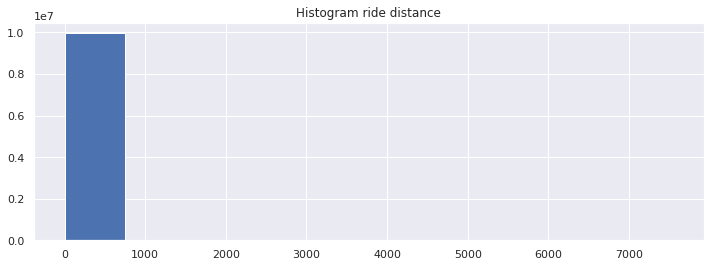

In [26]:
train_df["distance"].hist(figsize=(12,4))
plt.title("Histogram ride distance");

In [27]:
train_df['distance'].describe()

count    9.963965e+06
mean     2.547027e-01
std      1.399081e+01
min      0.000000e+00
25%      1.239305e-02
50%      2.143539e-02
75%      3.835107e-02
max      7.548848e+03
Name: distance, dtype: float64

We expect most of these values to be very small (likely between 0 and 1) since it should all be differences between GPS coordinates within one city. For reference, one degree of latitude is about 69 miles. However, we can see the dataset has extreme values which do not make sense. Let's remove those values from our training set. Based on the scatterplot, it looks like we can safely exclude values above 5 (though remember the scatterplot is only showing the first 2000 rows...)

In [28]:
print('Old size: %d' % len(train_df))
train_df = train_df[(train_df.abs_diff_longitude < 5.0) & (train_df.abs_diff_latitude < 5.0)]
print('New size: %d' % len(train_df))

Old size: 9963965
New size: 9943523


In [29]:
train_df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,weekday,month,year,abs_diff_longitude,abs_diff_latitude,distance
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,17,0,6,2009,0.002701,0.009041,0.009436
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1,16,1,1,2010,0.036780,0.070701,0.079696
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2,0,3,8,2011,0.008504,0.010708,0.013674
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1,4,5,4,2012,0.004437,0.024949,0.025340
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1,7,1,3,2010,0.011440,0.015754,0.019470


In [30]:
train_df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,weekday,month,year,abs_diff_longitude,abs_diff_latitude,distance
count,9.943523e+06,9.943523e+06,9.943523e+06,9.943523e+06,9.943523e+06,9.943523e+06,9.943523e+06,9.943523e+06,9.943523e+06,9.943523e+06,9.943523e+06,9.943523e+06,9.943523e+06
mean,1.134003e+01,-7.256882e+01,3.995091e+01,-7.256796e+01,3.995125e+01,1.690605e+00,1.351120e+01,3.041393e+00,6.267350e+00,2.011739e+03,2.251546e-02,2.111498e-02,3.377464e-02
std,9.780789e+00,1.075765e+01,6.592764e+00,1.075754e+01,6.592813e+00,1.306535e+00,6.517226e+00,1.949076e+00,3.434898e+00,1.862968e+00,3.854393e-02,2.896195e-02,4.622220e-02
min,1.000000e-02,-3.348349e+03,-3.488080e+03,-3.348349e+03,-3.488080e+03,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.009000e+03,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.000000e+00,-7.399209e+01,4.073497e+01,-7.399140e+01,4.073409e+01,1.000000e+00,9.000000e+00,1.000000e+00,3.000000e+00,2.010000e+03,5.790000e-03,6.575000e-03,1.237743e-02
50%,8.500000e+00,-7.398183e+01,4.075266e+01,-7.398018e+01,4.075318e+01,1.000000e+00,1.400000e+01,3.000000e+00,6.000000e+00,2.012000e+03,1.240000e-02,1.383000e-02,2.139010e-02
75%,1.250000e+01,-7.396717e+01,4.076714e+01,-7.396375e+01,4.076812e+01,2.000000e+00,1.900000e+01,5.000000e+00,9.000000e+00,2.013000e+03,2.359900e-02,2.682700e-02,3.817623e-02
max,1.273310e+03,3.442185e+03,2.973980e+03,3.442185e+03,2.973980e+03,6.000000e+00,2.300000e+01,6.000000e+00,1.200000e+01,2.015000e+03,4.975685e+00,4.991325e+00,6.315736e+00


## data visualization
<i>a picture is worth a thousand words</i><br>
In this part well do plot the data so that we can see the real picture. This will give us clear idea about the dataset and problem as well.

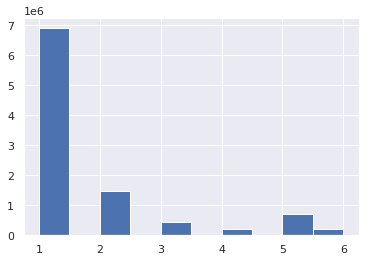

In [31]:
train_df.passenger_count.hist()

(0.0, 100.0)

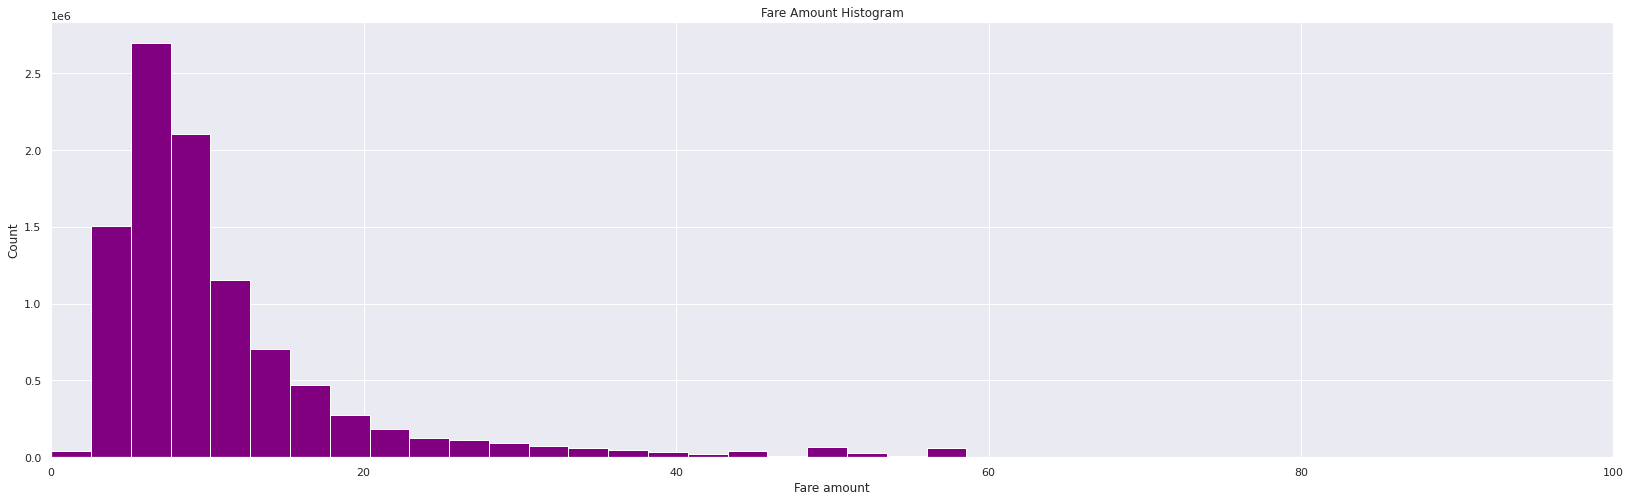

In [32]:
plt.figure(figsize=(28,8))
plt.hist(train_df["fare_amount"], 500, facecolor="purple")
plt.xlabel("Fare amount")
plt.ylabel("Count")
plt.title("Fare Amount Histogram")
plt.xlim(0,100)


Text(0, 0.5, 'Frequency')

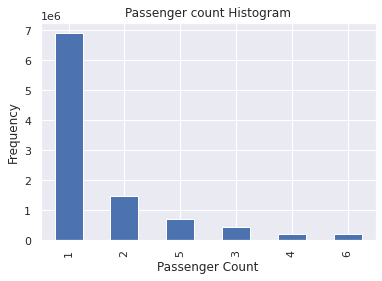

In [33]:
train_df["passenger_count"].value_counts().plot.bar()
plt.title("Passenger count Histogram")
plt.xlabel("Passenger Count")
plt.ylabel("Frequency")


In [34]:
def drop_unrealistic_distance(df):
    print('before: ' + str(df.shape))
    df = df.drop(df[train_df['distance'] < 0.01].index, axis = 0)
    print('after: ' + str(df.shape))
    return df
    
train_df = drop_unrealistic_distance(train_df)


before: (9943523, 15)
after: (8203939, 15)


In [35]:
train_df["fare_per_distance"] = train_df["fare_amount"] / train_df["distance"]
train_df["fare_per_distance"].describe()

count    8.203939e+06
mean     3.754881e+02
std      1.517397e+02
min      4.715623e-02
25%      2.835819e+02
50%      3.513208e+02
75%      4.350787e+02
max      1.891399e+04
Name: fare_per_distance, dtype: float64

Text(0.5, 1.0, 'Scatter DIagram of fare-amount')

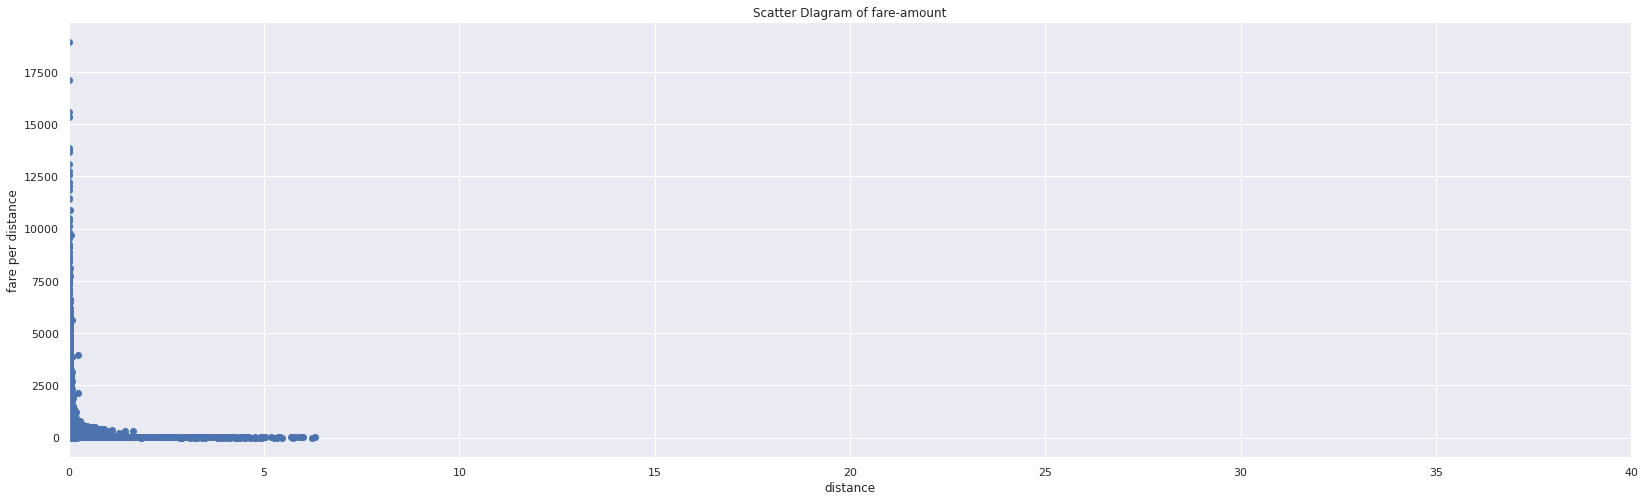

In [36]:
plt.figure(figsize=(28,8))
plt.scatter(train_df["distance"], train_df["fare_per_distance"])
plt.xlabel("distance")
plt.ylabel("fare per distance")
plt.xlim(0,40)
plt.title("Scatter DIagram of fare-amount")

In [37]:
train_df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,weekday,month,year,abs_diff_longitude,abs_diff_latitude,distance,fare_per_distance
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1,16,1,1,2010,0.036780,0.070701,0.079696,212.056690
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2,0,3,8,2011,0.008504,0.010708,0.013674,416.848376
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1,4,5,4,2012,0.004437,0.024949,0.025340,303.861732
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1,7,1,3,2010,0.011440,0.015754,0.019470,272.220407
5,2011-01-06 09:50:45.0000002,12.1,2011-01-06 09:50:45,-74.000964,40.731630,-73.972892,40.758233,1,9,3,1,2011,0.028072,0.026603,0.038675,312.863485


Text(0.5, 1.0, 'Fare variation in years')

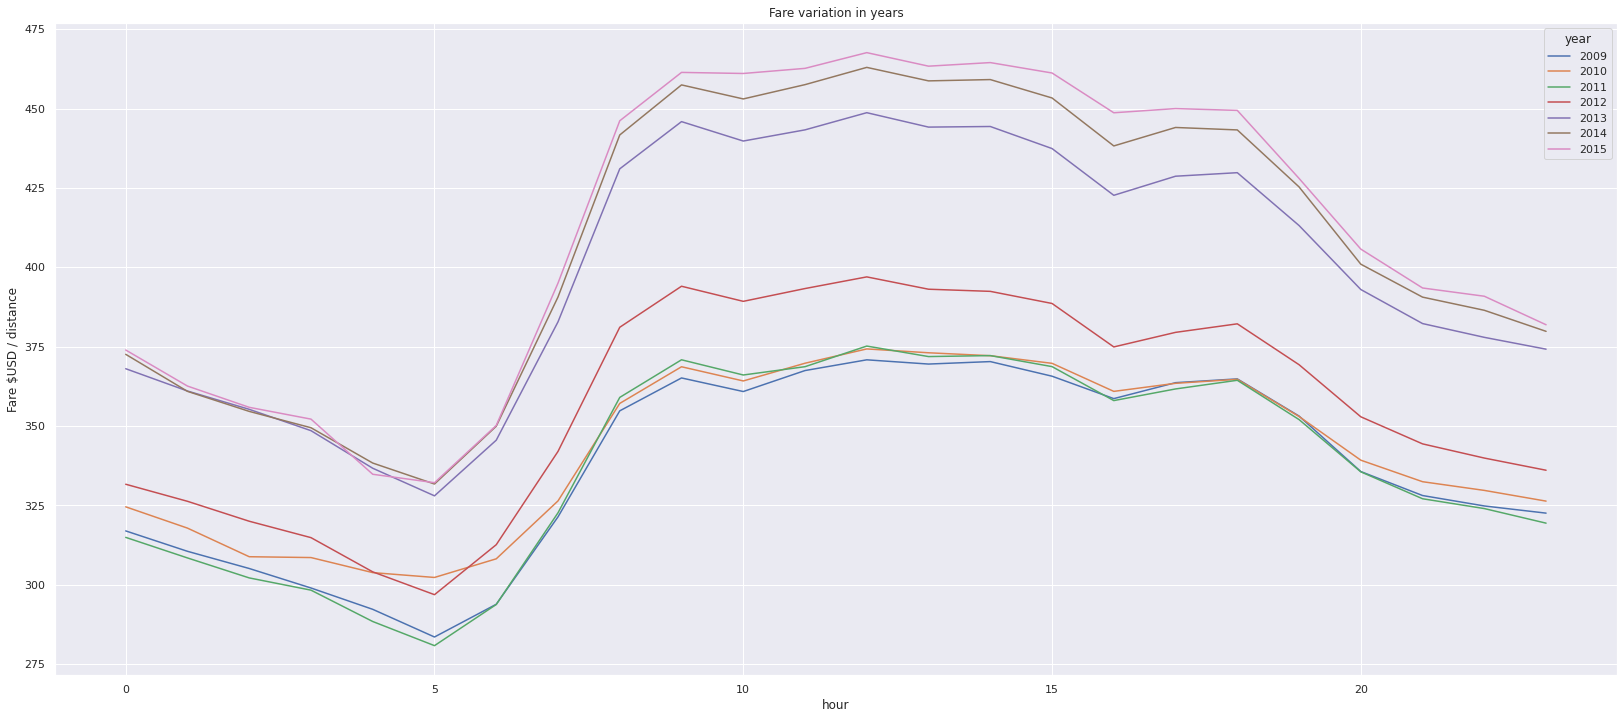

In [38]:
train_df.pivot_table('fare_per_distance', index='hour', columns='year').plot(figsize=(28,12))
plt.ylabel("Fare $USD / distance");
plt.title("Fare variation in years")

Text(0.5, 1.0, 'Fare variation in month')

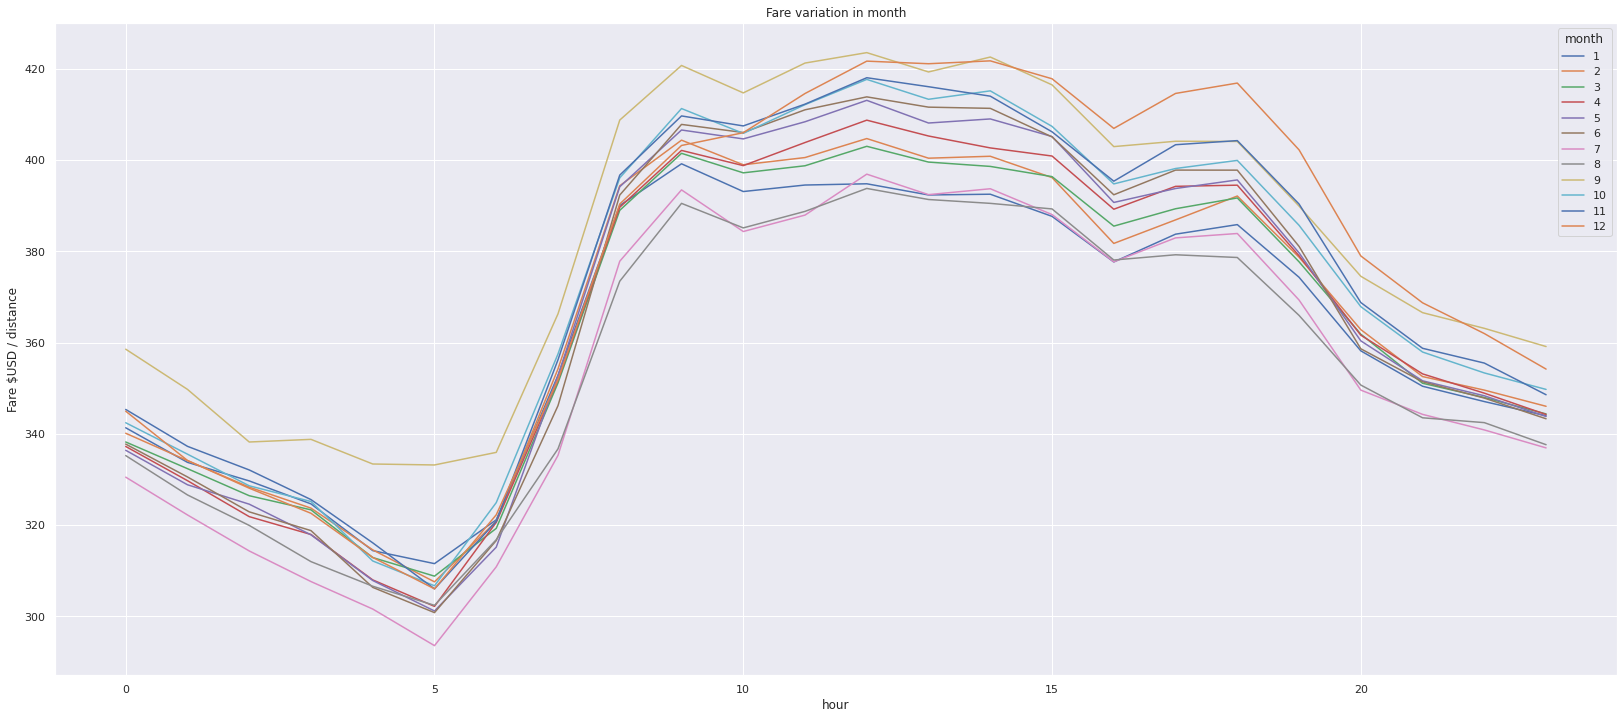

In [39]:
train_df.pivot_table("fare_per_distance", index="hour", columns="month").plot(figsize=(28,12))
plt.ylabel("Fare $USD / distance");
plt.title("Fare variation in month")

Text(0.5, 1.0, 'Fare variation in week days')

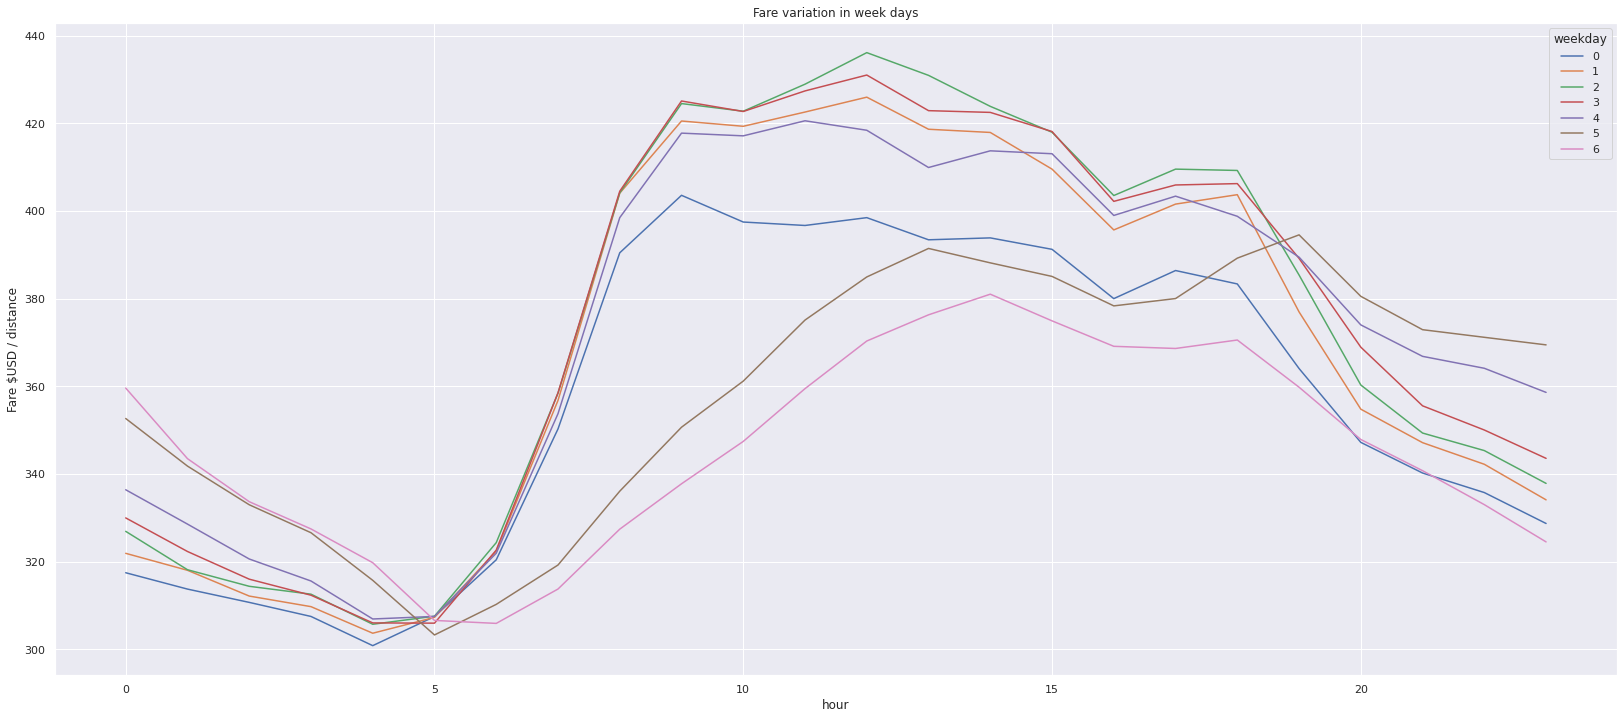

In [40]:
train_df.pivot_table("fare_per_distance", index="hour", columns="weekday").plot(figsize=(28,12))
plt.ylabel("Fare $USD / distance");
plt.title("Fare variation in week days")

Text(0.5, 1.0, 'Zoom in on distance < 15  and fare < $100')

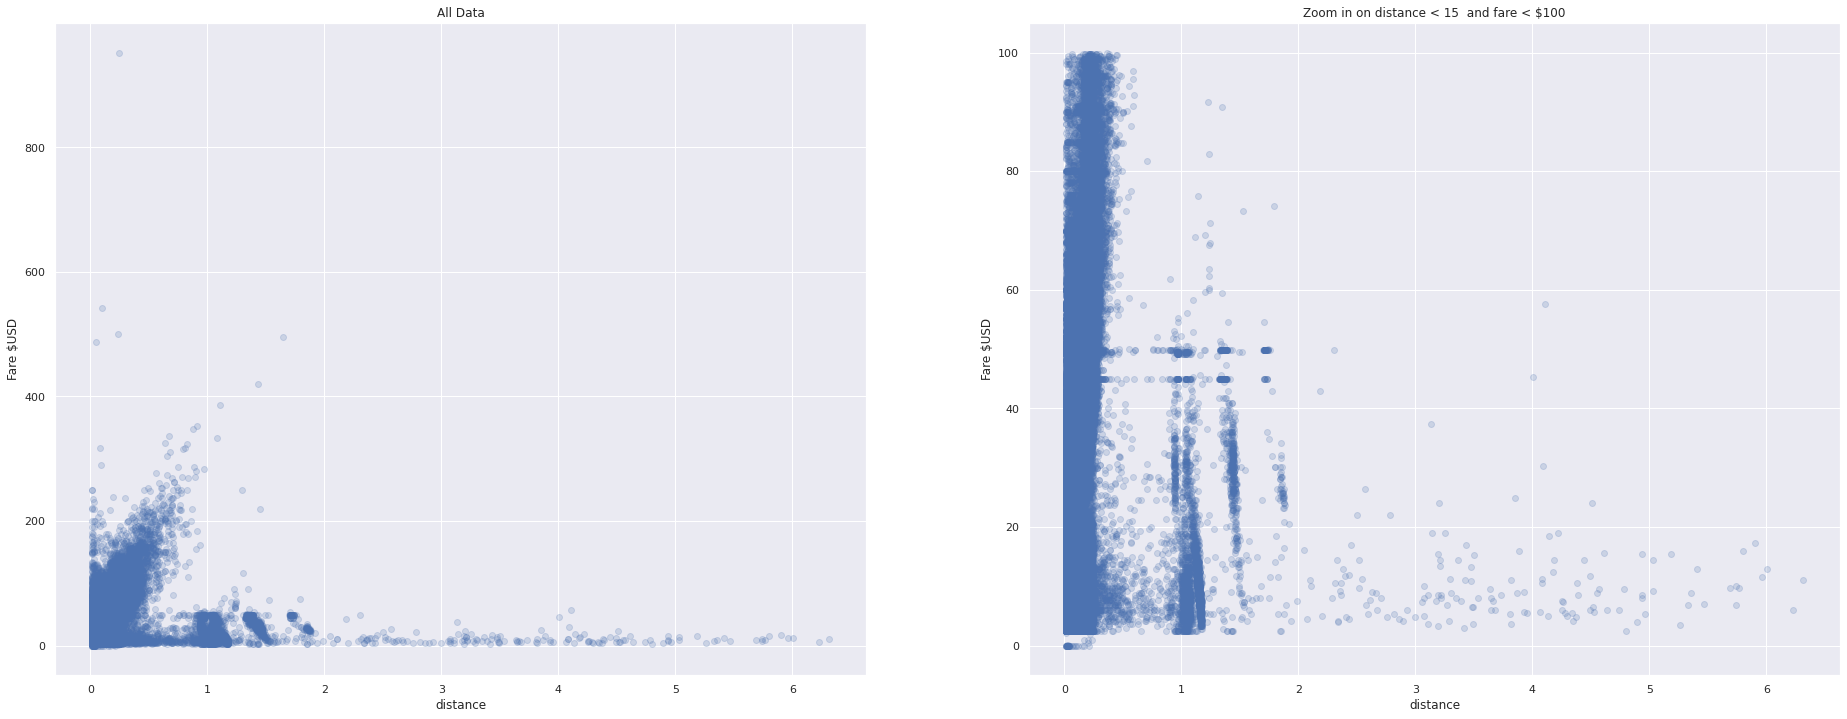

In [41]:
fig, axs = plt.subplots(1, 2, figsize=(32,12))
axs[0].scatter(train_df["distance"], train_df["fare_amount"], alpha=0.2)
axs[0].set_xlabel("distance")
axs[0].set_ylabel("Fare $USD")
axs[0].set_title("All Data")

idx = ((train_df['distance'] < 15) & (train_df["fare_amount"] < 100))
axs[1].scatter(train_df[idx]["distance"], train_df[idx]["fare_amount"], alpha=0.2)
axs[1].set_xlabel("distance")
axs[1].set_ylabel("Fare $USD")
axs[1].set_title("Zoom in on distance < 15  and fare < $100")

## Fare Prediction
So far, we have cleaned up our dataset, have done feature engineering and done visualization. Now it's time to predict the fare.

At the very 1st time, we had only 8 columns in out train dataset. But after doing a lots of operation now our tarin data set has some new columns. Mainly we'll use theose columns to predict the fare.

In [42]:
train_df.dtypes

key                           object
fare_amount                  float64
pickup_datetime       datetime64[ns]
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
passenger_count                int64
hour                           int64
weekday                        int64
month                          int64
year                           int64
abs_diff_longitude           float64
abs_diff_latitude            float64
distance                     float64
fare_per_distance            float64
dtype: object

In [43]:
train_df.shape

(8203939, 16)

In [44]:
train_df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,weekday,month,year,abs_diff_longitude,abs_diff_latitude,distance,fare_per_distance
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1,16,1,1,2010,0.036780,0.070701,0.079696,212.056690
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2,0,3,8,2011,0.008504,0.010708,0.013674,416.848376
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1,4,5,4,2012,0.004437,0.024949,0.025340,303.861732
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1,7,1,3,2010,0.011440,0.015754,0.019470,272.220407
5,2011-01-06 09:50:45.0000002,12.1,2011-01-06 09:50:45,-74.000964,40.731630,-73.972892,40.758233,1,9,3,1,2011,0.028072,0.026603,0.038675,312.863485


Here,<br>
Our model is: X * m = Y<br>
where, X = a matrix of input feature<br>
Y = target variable (fare)<br>
and m = weight<br>
So, in our training session, model will learn some weight that will be kept in m.

Now, we have to decide which columns form train value are going to feed as X.<br>
Here we'll use: <br>
passenger_count, hour, weekday, month, year, abs_diff_longitude, abs_diff_latitude from train dataset and also will be added 1 as bias.<br>
And then numpy's lstsq library function will be used to find the optimal weight column  m.


In [45]:
def get_input_matrix(df):
    return np.column_stack((df.passenger_count, df.hour, df.weekday, df.month, df.year, df.abs_diff_longitude, df.abs_diff_latitude, np.ones(len(df))))

train_X = get_input_matrix(train_df)
train_y = np.array(train_df['fare_amount'])

print(train_X.shape)
print(train_y.shape)

(8203939, 8)
(8203939,)


In [46]:
(m, _, _, _) = np.linalg.lstsq(train_X, train_y, rcond = None)
print(m)

[ 7.22998460e-02  1.68596349e-03 -2.58805752e-02  9.46214495e-02
  6.52325783e-01  1.45891991e+02  7.60138750e+01 -1.30638699e+03]


Finally it's time to predict the fare using test date but before that we have to make a matrix same as X and to do that we are reusing:<br>
add_time_features<br>
add_travel_vector_features<br>
function

In [47]:
test_df = add_time_features(test_df)
add_travel_vector_features(test_df)
test_df.head()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,weekday,month,year,abs_diff_longitude,abs_diff_latitude
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24,-73.973320,40.763805,-73.981430,40.743835,1,13,1,1,2015,0.008110,0.019970
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24,-73.986862,40.719383,-73.998886,40.739201,1,13,1,1,2015,0.012024,0.019817
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44,-73.982524,40.751260,-73.979654,40.746139,1,11,5,10,2011,0.002870,0.005121
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12,-73.981160,40.767807,-73.990448,40.751635,1,21,5,12,2012,0.009288,0.016172
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12,-73.966046,40.789775,-73.988565,40.744427,1,21,5,12,2012,0.022519,0.045348


In [48]:
test_X = get_input_matrix(test_df)
print(test_X.shape)

(9914, 8)


Now we have, <br>
test_X, m from train section. So it's time to find the test_Y

In [49]:
test_y_predictions = np.matmul(test_X, m).round(decimals = 2)

This will generate a CSV file to submit result in kaggle


In [50]:
submission = pd.DataFrame(
    {'key': test_df.key, 'fare_amount': test_y_predictions},
    columns = ['key', 'fare_amount'])
submission.to_csv('submission.csv', index = False)

print(os.listdir('.'))

['__notebook__.ipynb', 'submission.csv']


Now we have our submission.csv file that contains the predicted fare.

In [51]:
result_df = pd.read_csv('./submission.csv')
result_df.head()

,key,fare_amount
0,2015-01-27 13:08:24.0000002,10.91
1,2015-01-27 13:08:24.0000003,11.47
2,2011-10-08 11:53:44.0000002,7.16
3,2012-12-01 21:12:12.0000002,9.79
4,2012-12-01 21:12:12.0000003,13.94


#### Result Evaluation:
The evaluation metric for this project is the root mean-squared error or RMSE. RMSE measures the difference between the predictions of a model, and the corresponding ground truth. A large RMSE is equivalent to a large average error, so smaller values of RMSE are better. One nice property of RMSE is that the error is given in the units being measured, so you can tell very directly how incorrect the model might be on unseen data.<br>
RMSE is given by:<br>
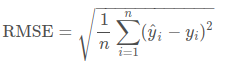
where yi is the ith observation and ^yi is the prediction for that observation.

Example 1. Suppose we have one observation, with an actual value of 12.5 and a prediction of 12.5 (good job!). The RMSE will be:<br>
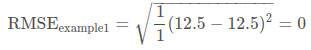

Example 2. We'll add another data point. Your prediction for the second data point is 11.0 and the actual value is 14.0. The RMSE will be:<br>
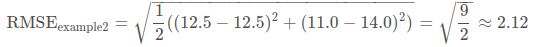

Text(0.5, 1.0, 'Model progress')

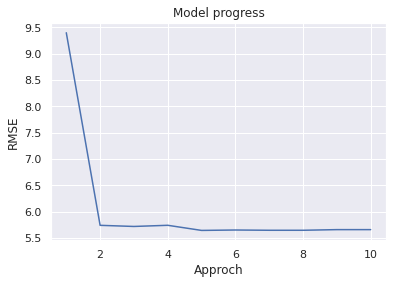

In [52]:
approch = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
RMSE = [9.39599, 5.74184, 5.72030, 5.74240, 5.64520, 5.65298, 5.64798, 5.64792, 5.66021, 5.66021]
plt.plot(approch, RMSE)
plt.ylabel("RMSE");
plt.xlabel("Approch");
plt.title("Model progress")

## conclusion:

New York City Taxi Fare Prediction is a very interesting real life problem to solve. By solving this problem one can get in to ML world.
##### Further Improvement:
New York City Taxi Fare Prediction has a very lagre dataset. A small part of that is used here. So by using large amount of rows can imporve the result. We also have used a linear model. Using a complex and non-linear model can also improve the result as well.

### reference:
- [NumPy](https://numpy.org/)
- [Matplotlib](https://matplotlib.org/)
- [pandas](https://pandas.pydata.org/)
- [An Introduction to Linear Regression Analysis](https://youtu.be/zPG4NjIkCjc)
- [Kernels Starter Tutorial](https://www.kaggle.com/breemen/nyc-taxi-fare-data-exploration)
- [Easy to use map and GPS tool](https://www.gps-coordinates.net/)
- [Calculate distance between locations](https://www.travelmath.com/distance/)